In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
image = cv2.imread(r"C:\aiprojects\computer-vision\dexter.jpg")

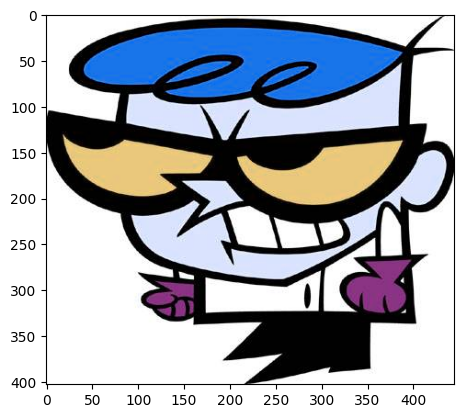

In [3]:
# cv2.imshow("Image", image)
# cv2.waitKey(0)
plt.imshow(image)
plt.show()

In [4]:
image.shape

(403, 445, 3)

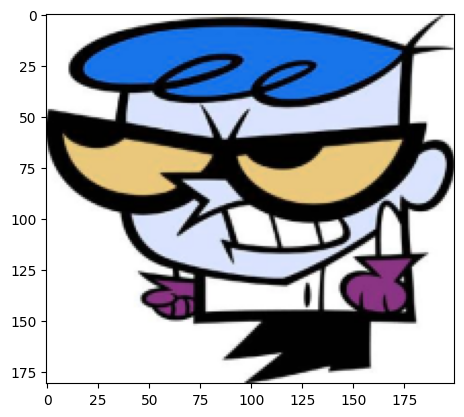

In [10]:
# Resizing

# Let's say we want to reduce the width to 200
# Ratio of width and height should remain same

# shape >> (height, width, channel)
original_width = image.shape[1]
original_height = image.shape[0]
r = original_height / original_width

new_width = 200
new_height = new_width * r
dim = (int(new_width), int(new_height))

resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
plt.imshow(resized)
plt.show()

In [11]:
resized.shape

(181, 200, 3)

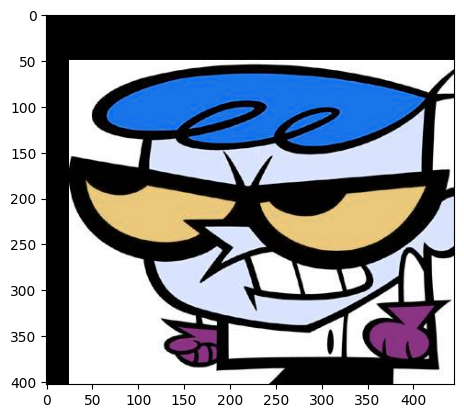

In [13]:
# Translation

# Transformation matrix for 2x2 matrix (image) is in the form of
# [1,0,dx]
# [0,1,dy]
# [0,0,1]
# We don't need to specify the last row for affine transformation

# Moving 25 pixels to the right and 50 pixels down
M = np.float32([[1, 0, 25], [0, 1, 50]])

shifted = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))

plt.imshow(shifted)
plt.show()

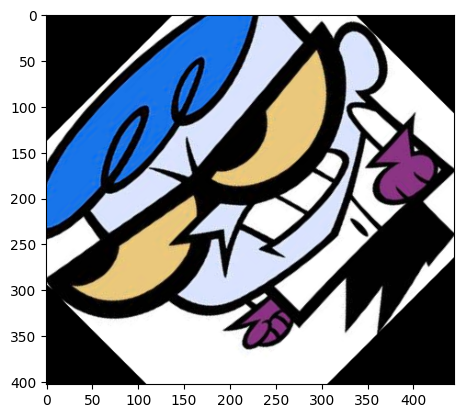

In [16]:
# Rotation

# Find the center of the image
(h, w) = image.shape[:2]
center = (w // 2, h // 2)

# Built-in function to get the rotation matrix
# Format
# [cos(theta) sin(theta) 1]
# [-sin(theta) cos(theta) 1]
# [0            0          1]

# Rotation around center 45 degrees and no scaling (1.0 is for scaling)
# +ve degree = anti-clockwise
# -ve degree = clockwise
R = cv2.getRotationMatrix2D(center, 45, 1.0)

# See the (w,h) format here is opposite than (h,w) format in image shape
rotated = cv2.warpAffine(image, R, (w, h))
plt.imshow(rotated)
plt.show()

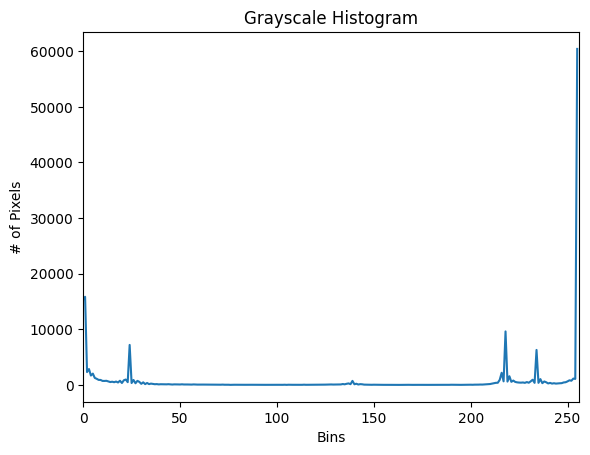

In [20]:
# Histogram
# Represents pixels intensity
# When plotting the histogram, the X-axis serves as our **“bins”**
# If we construct a histogram with 256 bins, then we are effectively ...
# ...counting the number of times each pixel value occurs
# If we use only 2 (equally spaced) bins, then we are counting...
# ...the number of times a pixel is in the range **[0, 128)** or **[128, 255]**

# Syntax:
# hist = cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])
# histSize = bins
# ranges = This specifies the range of values you want to measure. For grayscale images, it is [0,256].

# Grascale Histogram
hist = cv2.calcHist([image], [0], None, [256], [0, 256])

plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])
plt.show()

In [23]:
%%capture
"""
Interpreting the histogram can provide insights into the overall tonal distribution of the image. Here are some general interpretations:

Brightness/Contrast:

If most of the histogram is concentrated on the left side, the image is likely dark.
If most of the histogram is concentrated on the right side, the image is likely bright.
A balanced distribution across the entire range indicates a good overall contrast.
Intensity Peaks:

Peaks in the histogram indicate dominant intensity values. Multiple peaks might suggest the presence of different objects or regions with distinct intensity levels.
Saturation:

In color images, individual channels (R, G, B) have their own histograms. Spikes in these histograms may indicate the presence of specific colors.
Dynamic Range:

The spread of the histogram across the intensity range reflects the image's dynamic range. A wider spread indicates a greater range of intensity values.
Clipping:

If the histogram is cut off at the extreme ends (values close to 0 or 255), it suggests that some pixel intensities have reached their limits, resulting in loss of detail (clipping).
Here's an example of interpreting a histogram:

Left-skewed Histogram:

If most of the values are on the left side, the image might be dark or underexposed.
Adjusting the brightness or stretching the histogram might improve visibility.
Right-skewed Histogram:

If most of the values are on the right side, the image might be bright or overexposed.
Adjusting the brightness or contrast might improve the image.
"""

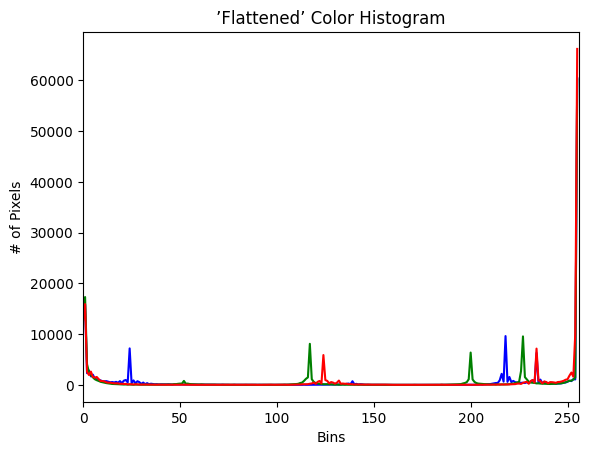

In [24]:
# Color Histogram
chans = cv2.split(image)
colors = ("b", "g", "r")

plt.figure()
plt.title("’Flattened’ Color Histogram") 
plt.xlabel("Bins")
plt.ylabel("# of Pixels")

# Loop over the image channels
for (chan, color) in zip(chans, colors):
    # cv2.calcHist(images,channels,mask,histSize,ranges)
    hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
    plt.plot(hist, color = color)
    plt.xlim([0, 256])

Convolution

In [26]:
from skimage.exposure import rescale_intensity

In [27]:
kernel = np.array([[0, 0, 0],
                   [0, 1, 0],
                   [0, 0, 0]])

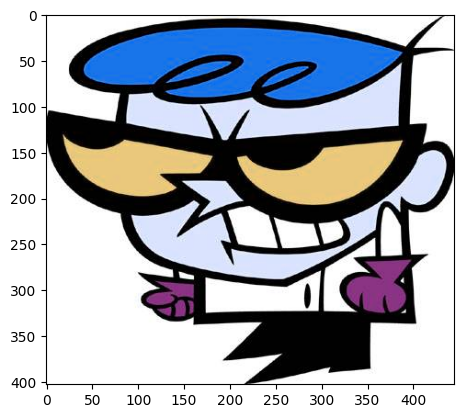

In [28]:
# -1 is desired depth of destination image. -1 is for same depth as the source image.
# This kernel will do nothing.. same image
convolved_image = cv2.filter2D(image, -1, kernel)
plt.imshow(convolved_image)
plt.show()

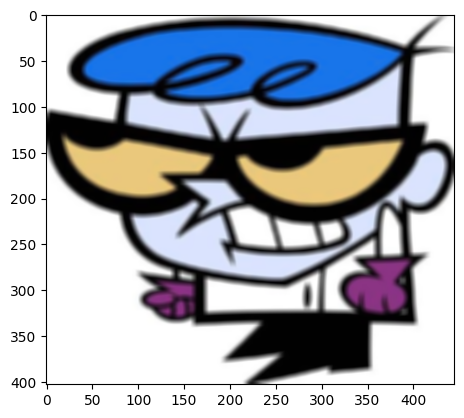

In [32]:
# Blur kernel is having same values in all elements between 0 to 1
# Increase value from 7 to increase blur effect
blur_kernel = np.ones((7, 7), dtype="float") * (1.0 / (7 * 7))
blurred_image = cv2.filter2D(image, -1, blur_kernel)
plt.imshow(blurred_image)
plt.show()

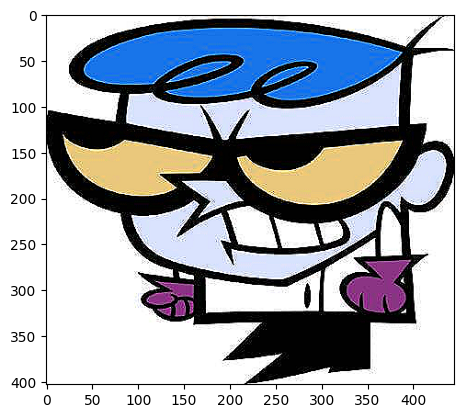

In [37]:
# Sharpening will show the features like edge more clearly
# So, to identify not so clearly visible features, we can use this
sharpen_kernel = np.array(([0, -1, 0],
                            [-1, 5, -1],
                                [0, -1, 0]), dtype="int")

sharpened_image = cv2.filter2D(image, -1, sharpen_kernel)
plt.imshow(sharpened_image)
plt.show()

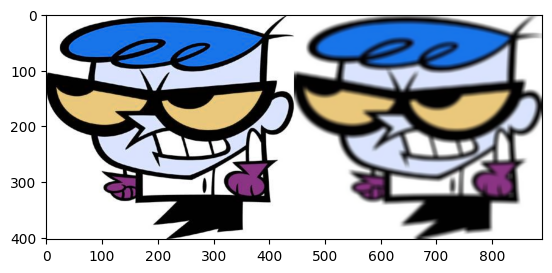

In [47]:
# Another way of blurring - Average Blur
# Higher the value of kernel (9) more blurred the image will be
# In the application where we don't want to detect all the edges but the most prominent edges.
# ... we can blur the image

blur = cv2.blur(image, (9, 9))
plt.imshow(np.hstack([image, blur]))
plt.show()

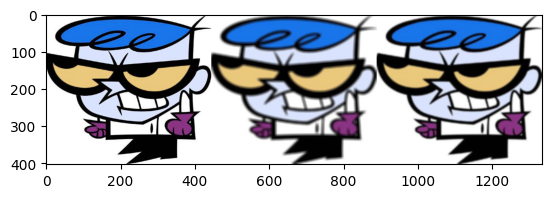

In [48]:
# Gaussian Blur
# In this, the contribution of each pixel in blur kernel is weighted according to gaussian distribution
# 0 is the standard deviation = gaussian spread
# Basically, this blur method puts more emphasis on the pixels closer to the center

gaussianblur = cv2.GaussianBlur(image, (9, 9), 0)
plt.imshow(np.hstack([image, blur, gaussianblur]))
plt.show()

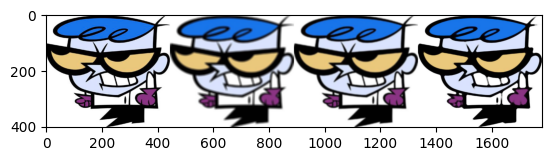

In [50]:
# Median Blur
# the median filter replaces each pixel value with the median value of its neighborhood. 
# This makes it particularly effective at removing salt-and-pepper noise in images.
# ksize = 9 (size of the kernel)

medianblur = cv2.medianBlur(image, 9)
plt.imshow(np.hstack([image, blur, gaussianblur, medianblur]))
plt.show()

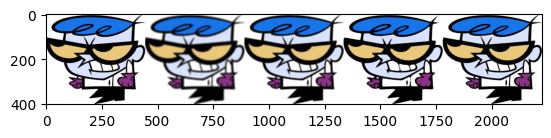

In [51]:
# Bilateral Filter
# Previos methods >> looses edge information in blurred image
# This is used to reduce noise by keeping edge information
# 2 Gaussian Distributions
# 1 for spatial neighbors - pixels neighboring in x,y space
# 1 for pixel intensity - pixels with similar intensities
# slower than previous methods due to more computation

bilblur = cv2.bilateralFilter(image, 3, 21, 21)
plt.imshow(np.hstack([image, blur, gaussianblur, medianblur, bilblur]))
plt.show()